In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
#load data
def read_json_to_dataframe(filename):
    print(filename)
    f1 = pd.read_stata(filename)[['location_id','partner_id','product_id','export_value','import_value']]
    return f1

def read_in(path):
    files = os.listdir(path)
    all_dfs = []
    print(files)
    for i in files:
        each_df = read_json_to_dataframe(path+i)
        all_dfs.append(each_df)
            
    return all_dfs

all_dfs = read_in('C:/Users/luoyu/Desktop/USCISI/ATLAS/International Trade Data (HS,92) 4-digits/')

['country_partner_hsproduct4digit_year_1995.dta', 'country_partner_hsproduct4digit_year_1996.dta', 'country_partner_hsproduct4digit_year_1997.dta', 'country_partner_hsproduct4digit_year_1998.dta', 'country_partner_hsproduct4digit_year_1999.dta', 'country_partner_hsproduct4digit_year_2000.dta', 'country_partner_hsproduct4digit_year_2001.dta', 'country_partner_hsproduct4digit_year_2002.dta', 'country_partner_hsproduct4digit_year_2003.dta', 'country_partner_hsproduct4digit_year_2004.dta', 'country_partner_hsproduct4digit_year_2005.dta', 'country_partner_hsproduct4digit_year_2006.dta', 'country_partner_hsproduct4digit_year_2007.dta', 'country_partner_hsproduct4digit_year_2008.dta', 'country_partner_hsproduct4digit_year_2009.dta', 'country_partner_hsproduct4digit_year_2010.dta', 'country_partner_hsproduct4digit_year_2011.dta', 'country_partner_hsproduct4digit_year_2012.dta', 'country_partner_hsproduct4digit_year_2013.dta', 'country_partner_hsproduct4digit_year_2014.dta', 'country_partner_hs

In [3]:
for i in range(len(all_dfs)):
    all_dfs[i]['year'] = 1995+i
full_df = pd.concat(all_dfs, ignore_index=True)

In [6]:
#intersect to find consistent countries
locations = pd.read_stata(r'C:\Users\luoyu\Desktop\USCISI\ATLAS\locations.dta')
all_sets = []
for df in all_dfs:
    country_set = set(df.location_id)
    all_sets.append(country_set)
intersect_countries = set.intersection(*all_sets)

for df in all_dfs:
    country_set = set(df.partner_id)
    all_sets.append(country_set)
intersect_countries_partner = set.intersection(*all_sets)

#find inconsistent countries to exclude from country list
all_locations = range(1,250)
excluded_location_ix = [i for i in all_locations if i not in list(intersect_countries)]
excluded_location = locations.iloc[excluded_location_ix]

In [7]:
#filtered out inconsistent countries
filtered_df = full_df[full_df['location_id'].isin(list(intersect_countries))]
filtered_df = filtered_df[filtered_df['partner_id'].isin(list(intersect_countries_partner))]

In [8]:
filtered_df.to_stata('HS_countries_filtered_export_import.dta')

In [2]:
filtered_df = pd.read_stata(r'C:\Users\luoyu\Desktop\USCISI\ATLAS\HS_countries_filtered_export_import.dta')

In [53]:
filtered_df = filtered_df[['location_id','export_value','import_value','year']]
grouped_df = filtered_df.groupby(['location_id','year']).sum()

In [54]:
grouped_df['trade_total'] = grouped_df['export_value']+grouped_df['import_value']
grouped_df['diff'] = grouped_df['export_value']+grouped_df['import_value']

In [55]:
grouped_df['diff'] = grouped_df['diff'].diff()

In [56]:
grouped_df['diff_percect'] = grouped_df['diff']/grouped_df['trade_total'].shift()

In [57]:
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df[grouped_df.year != 1995]

In [47]:
grouped_df = grouped_df[grouped_df.location_id != 220]

In [27]:
locations = pd.read_stata(r'C:\Users\luoyu\Desktop\USCISI\ATLAS\locations.dta')
locations.iloc[220]

index                             220
location_id                       220
location_code                     TLS
location_name_short_en    Timor-Leste
level                         country
parent_id                         353
Name: 220, dtype: object

In [24]:
year2000 = grouped_df[grouped_df['year']==2000]
year2000[year2000['diff_percect']==358.36295319182955]

,location_id,year,export_value,import_value,trade_total,diff,diff_percect
4517,220,2000,29811048.0,60090782.0,89901830.0,89651660.0,358.362953


In [28]:
grouped_df[grouped_df['location_id']==220]

,location_id,year,export_value,import_value,trade_total,diff,diff_percect
4513,220,1996,135863.0,3088950.0,3.224813e+06,-374479.0,-0.104042
4514,220,1997,416761.0,222143.0,6.389040e+05,-2585909.0,-0.801879
4515,220,1998,253744.0,143832.0,3.975760e+05,-241328.0,-0.377722
4516,220,1999,250170.0,0.0,2.501700e+05,-147406.0,-0.370762
4517,220,2000,29811048.0,60090782.0,8.990183e+07,89651660.0,358.362953
4518,220,2001,6443368.0,79769110.0,8.621248e+07,-3689352.0,-0.041038
4519,220,2002,15774129.0,120234947.0,1.360091e+08,49796598.0,0.577603
4520,220,2003,7961333.0,135792448.0,1.437538e+08,7744705.0,0.056943
4521,220,2004,50814166.0,100384328.0,1.511985e+08,7444713.0,0.051788
4522,220,2005,63193777.0,103290065.0,1.664838e+08,15285348.0,0.101095


In [58]:
average_change = grouped_df[['year','diff','diff_percect']].groupby('year').mean()

In [48]:
average_change_east_ti = grouped_df[['year','diff','diff_percect']].groupby('year').mean()

Text(0, 0.5, 'Average Year-on-year Change in Trade Volume')

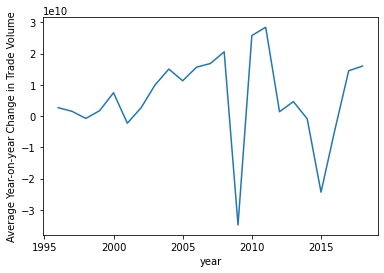

In [44]:
plt.plot(average_change['diff'])
plt.xlabel('year', fontsize=10)
plt.ylabel('Average Year-on-year Change in Trade Volume', fontsize=10)
#plt.title('Average Year-on-year Change in Trade Volume')


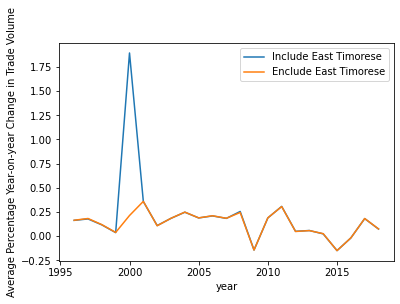

In [60]:
plt.plot(average_change['diff_percect'],label='Include East Timorese')
plt.plot(average_change_east_ti['diff_percect'],label='Enclude East Timorese')
plt.xlabel('year', fontsize=10)
plt.ylabel('Average Percentage Year-on-year Change in Trade Volume', fontsize=10)
#plt.title('Average Percentage Year-on-year Change in Trade Volume')
plt.legend()
plt.show()

In [52]:
average_change

,diff,diff_percect
year,,
1996,2.686040e+09,0.163893
1997,1.524023e+09,0.182160
1998,-7.590104e+08,0.118484
1999,1.737758e+09,0.038005
2000,7.465534e+09,0.212905
2001,-2.287309e+09,0.359171
2002,2.693809e+09,0.106825
2003,9.957648e+09,0.184388
2004,1.505037e+10,0.248128
